## Measuring Performance ##
In this notebook, we will analyse the behaviour of the parallel crawler for different number of threads.

In [1]:
# necessary imports
import subprocess
import matplotlib.pyplot as plt

In [2]:
num_threads = 10      # Threads from 1 to num_threads
max_size = 20000    # Until the SetList gets to max_size

link = "https://en.wikipedia.org/wiki/Main_Page"

In [3]:
time_insertion = dict() # dictionary {num_inserted: {num_threads : time (microseconds)} }

subprocess.run(["make", "clean"])
subprocess.run(["make"])

for i in range(1, num_threads + 1):
    time_insertion[i] = dict()

    output = subprocess.run(["./main", link, str(i), str(max_size), "-v"], capture_output=True)
    
    for inser_str in output.stdout.decode("utf-8").split('\n'):

        if inser_str == '': continue

        if len(inser_str.split(' ')) == 3:
            curr_ins, time_i, time_crawl = inser_str.split(' ')
            time_insertion[i][int(curr_ins)] = (int(time_i)*1e-6, int(time_crawl)*1e-6)

        else :
            print(inser_str)
            raise AssertionError

subprocess.run(["make", "clean"]);


KeyboardInterrupt: 

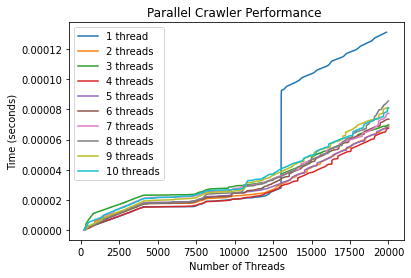

In [5]:

plt.title("Parallel Crawler Performance ")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")


for (thread_no, thread_no_info) in time_insertion.items():
    X = list(time_insertion[thread_no].keys())
    Y = []

    time_overall = 0
    for i in range(len(X)):
        time_tot, time_crawl = time_insertion[thread_no][X[i]]
        time_overall += time_tot
        Y.append(time_overall*1e-6)
    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()


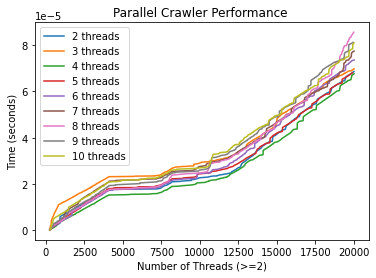

In [6]:

plt.title("Parallel Crawler Performance ")
plt.xlabel("Number of Threads (>=2)")
plt.ylabel("Time (seconds)")


for (thread_no, thread_no_info) in time_insertion.items():
    if thread_no == 1:
        continue
    X = list(time_insertion[thread_no].keys())
    Y = []

    time_overall = 0
    for i in range(len(X)):
        time_tot, time_crawl = time_insertion[thread_no][X[i]]
        time_overall += time_tot
        Y.append(time_overall*1e-6)
    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

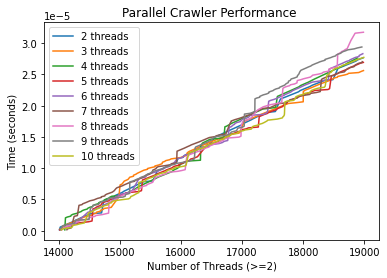

In [7]:

plt.title("Parallel Crawler Performance ")
plt.xlabel("Number of Threads (>=2)")
plt.ylabel("Time (seconds)")


for (thread_no, thread_no_info) in time_insertion.items():
    if thread_no == 1:
        continue
    X = list(time_insertion[thread_no].keys())
    X = [i for i in X if 14000<=i<=19000]
    Y = []

    time_overall = 0
    for i in range(len(X)):
        time_tot, time_crawl = time_insertion[thread_no][X[i]]
        time_overall += time_tot
        Y.append(time_overall*1e-6)
    if thread_no == 1: 
        plt.plot(X,Y, label = f"{thread_no} thread")
    else:
        plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (416,) and (557,)

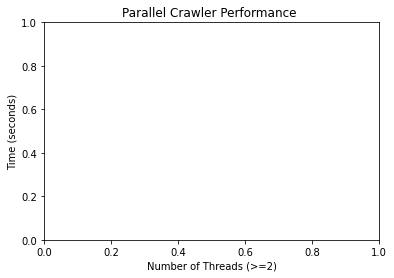

In [8]:
thread_no = 4


plt.title("Parallel Crawler Performance ")
plt.xlabel("Number of Threads (>=2)")
plt.ylabel("Time (seconds)")


X = list(time_insertion[thread_no].keys())
time_tot = []
time_to_crawl = []

time_overall = 0
for i in range(len(X)):
    time_tot, time_crawl = time_insertion[thread_no][X[i]]
    time_overall += time_tot
    Y.append(time_overall*1e-6)
if thread_no == 1: 
    plt.plot(X,Y, label = f"{thread_no} thread")
else:
    plt.plot(X,Y, label = f"{thread_no} threads")
    
plt.legend()
plt.show()